## **Iris Classification Problem**

---



Riesci a distinguere tre diverse specie di iris?

È anche noto come set di dati Iris di Anderson poiché Edge Anderson ha originariamente raccolto i dati per quantificare la variazione dei fiori di Iris di una classe diversa. Queste classi sono la classe Iris-Setosa, Iris-Versicolor, Iris-Virginica con attributi come **Lunghezza sepalo, Larghezza sepalo, Lunghezza petalo e Larghezza petalo in centimetri.**



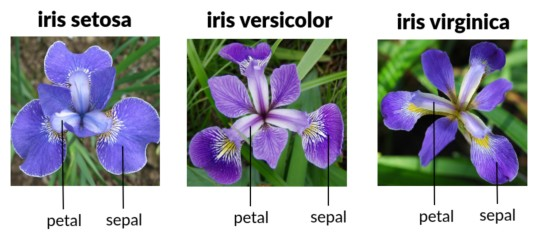

Caratteristiche di questo set di dati:

1.   150 campioni, con 4 attributi
2.   Distribuzione equilibrata delle classi (50 campioni per ogni classe)
3.   Nessun dato mancante



## **Due obiettivi**

---
1. **Previsione:** dati i nuovi punti dati, con quale precisione il modello può prevedere le loro classi (specie)?

2. **Inferenza:** quali predittori possono effettivamente aiutare con le previsioni?

## **Carichiamo il dataset**

---
Importiamo prima la libreria che ci serve


In [1]:
import pandas as pd
import seaborn as sns

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


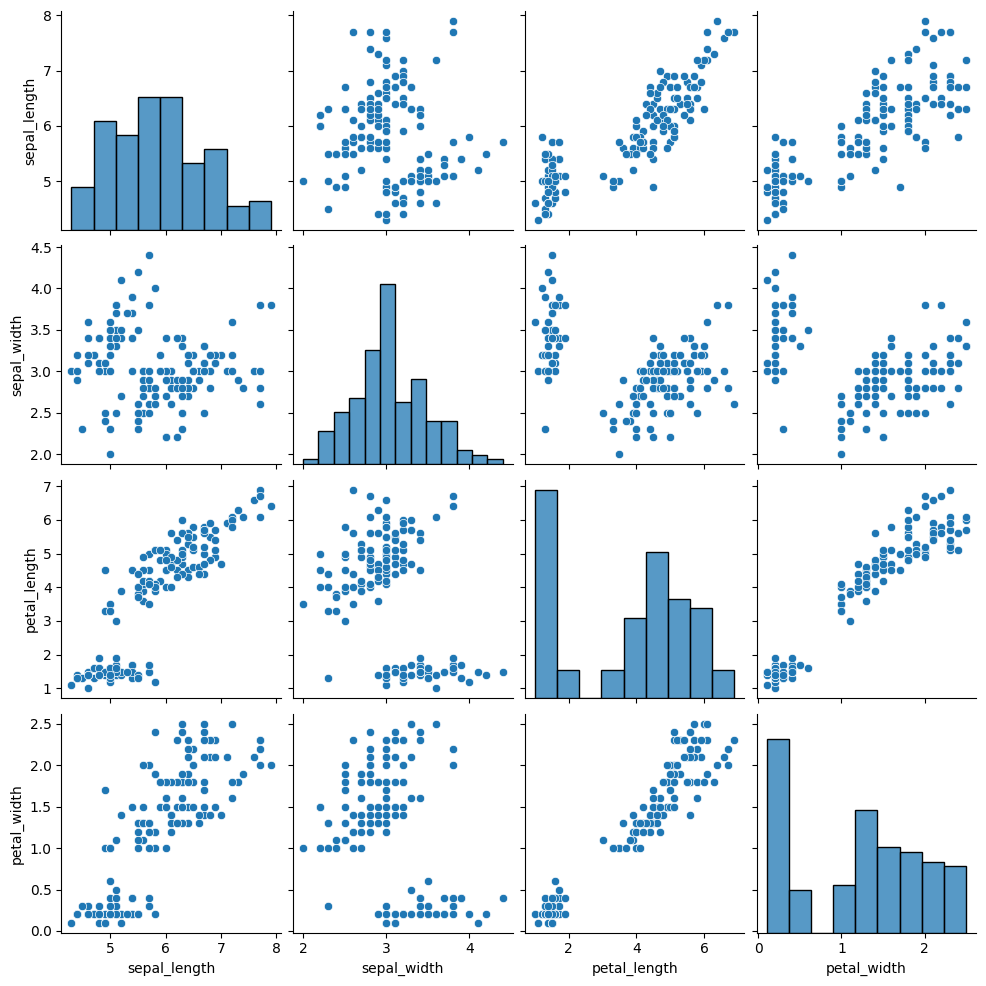

In [3]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "classes"]
dataset = pd.read_csv(url, header=None)
print(dataset)
dataset.columns=attributes
dataset.head(5)
#dataset.dtypes
sns.pairplot(dataset)


In [ ]:
# sintesi numerica, si applica solo alle colonne numeriche
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   classes       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# numero di istanze in ciascuna classe
dataset.groupby('classes').size()

classes
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## **Exploratory Data Analysis**
---
Questo è un passo cruciale che andrebbe implementato in ogni progetto di analisi, in quanto fornisce diverse prospettive sul problema.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

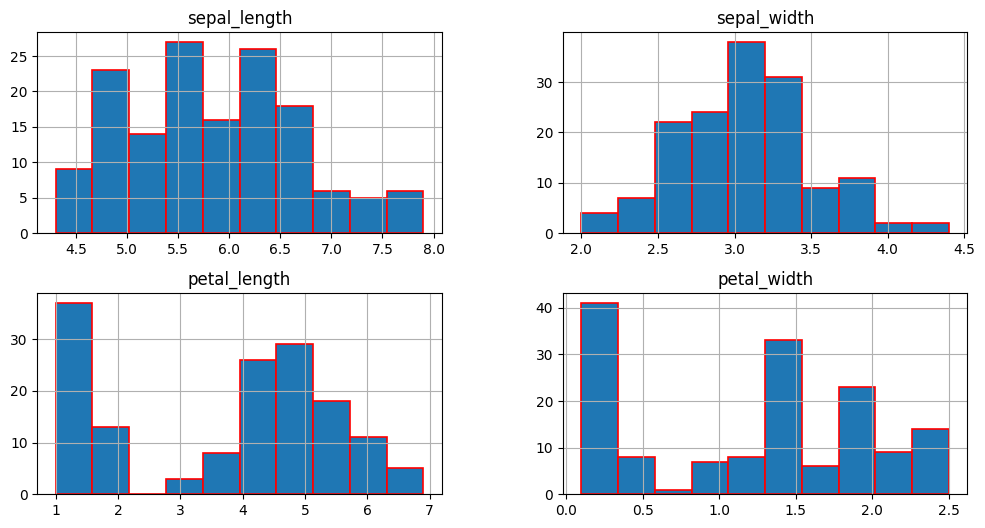

In [ ]:
dataset.hist(edgecolor='red', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

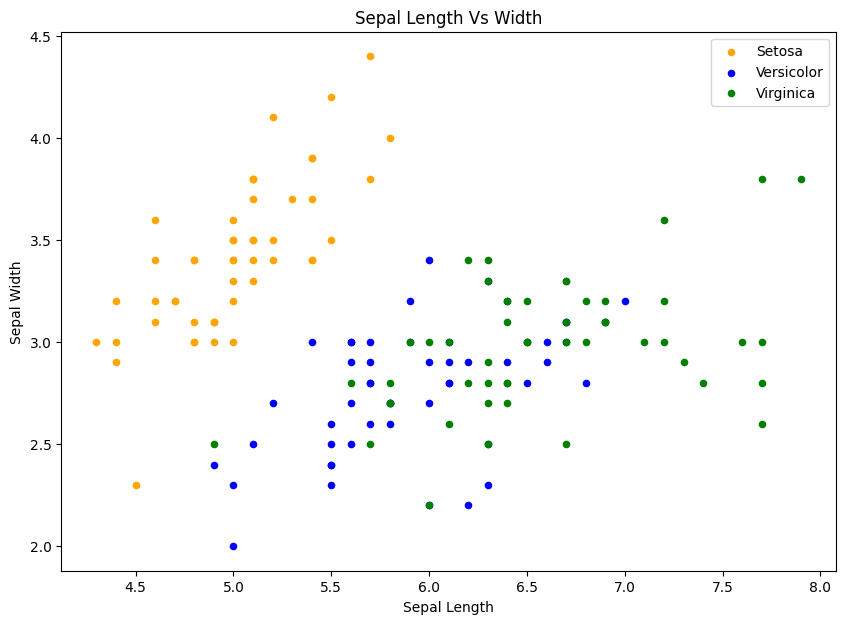

In [ ]:
dati_setosa=dataset[dataset['classes'] == 'Iris-setosa']
dati_versicolor=dataset[dataset['classes'] == 'Iris-versicolor']
dati_virginica=dataset[dataset['classes'] == 'Iris-virginica']

fig = dati_setosa.plot(kind='scatter', x='sepal_length', y='sepal_width', color='orange', label='Setosa')
dati_versicolor.plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='Versicolor', ax=fig)
dati_virginica.plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Virginica', ax=fig)


fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

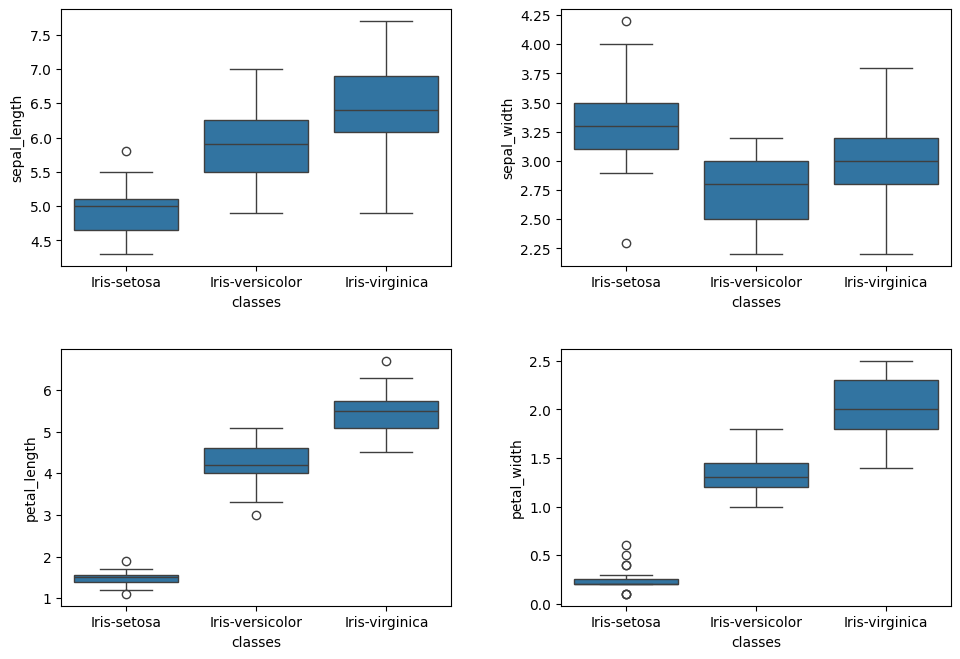

In [ ]:
# boxplots
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size = 0.4, random_state = 42)


fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'classes', y = 'sepal_length', data=train,  order = cn, ax = axs[0,0]);
sns.boxplot(x = 'classes', y = 'sepal_width', data=train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'classes', y = 'petal_length', data=train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'classes', y = 'petal_width', data=train, order = cn, ax = axs[1,1]);

fig.tight_layout(pad=1.0);
fig.set_size_inches(10, 7)



In [ ]:
num_elementi_unici_col1 = test['classes'].value_counts()
num_elementi_unici_col1

classes
Iris-setosa        23
Iris-versicolor    19
Iris-virginica     18
Name: count, dtype: int64

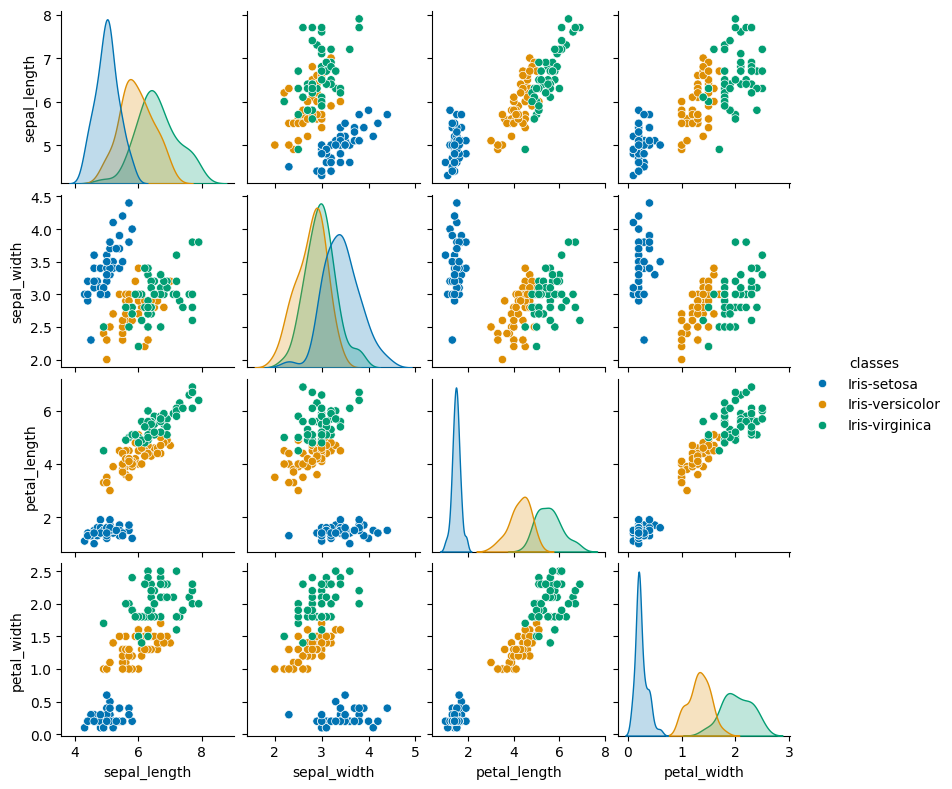

In [ ]:
#relazioni a due a due
sns.pairplot(dataset, hue="classes", height = 2, palette = 'colorblind');

## **Let's go!**

---



In [9]:
from sklearn.model_selection import train_test_split

# Tralasciamo il target e la specie poiché abbiamo solo bisogno delle misurazioni
X = dataset.drop(['classes'], axis=1)
Y=dataset['classes']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
print(X_train)

     sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[105 rows x 4 columns]


# **Alleniamo**

In [14]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

#MODELLO 1
model = SVC() # select the svm algorithm
model.fit(X_train, y_train)



SVC()

In [11]:
print(X_test)
model.predict(X_test)

     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
31            5.4          3.4           1.5          0.4
64            5.6          2.9           3.6          1.3
141           6.9          3.1           5.1          2.3
68            6.2          2.2           4.5          1.5
82            5.8          2.7           3.9          1.2
110           6.5          3.2           5.1          2.0
12            4.8          3.0           1.4          0.1
36            5.5          3.5           1.3          0.2
9             4.9          3.1           1.5          0.1
19            5.1          3.8           1.5          0.3
56            6.3          3.3           4.7          1.6
104           

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [12]:
y_test

,classes
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor
31,Iris-setosa
64,Iris-versicolor
141,Iris-virginica
68,Iris-versicolor
82,Iris-versicolor


# **Testiamo**

In [13]:
prediction = model.predict(X_test)
print('The accuracy of the SVM is: ', accuracy_score(prediction, y_test))
cf=confusion_matrix(y_test, prediction)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, prediction))

print("Classifiction Report :")
print(classification_report(y_test, prediction))

The accuracy of the SVM is:  1.0
Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classifiction Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



NameError: name 'plt' is not defined

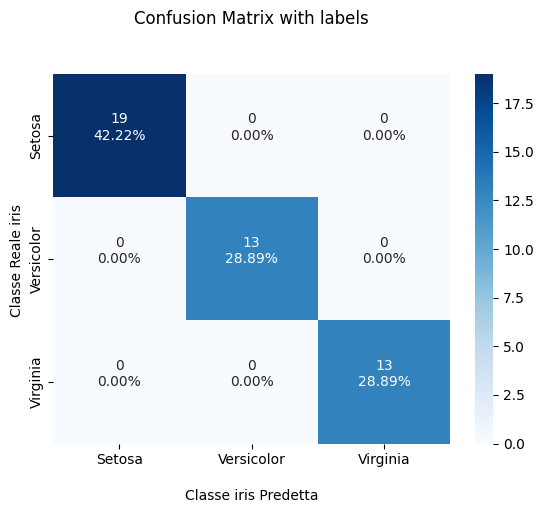

In [15]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
ax = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nClasse iris Predetta')
ax.set_ylabel('Classe Reale iris ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

The accuracy of the SVM is:  1.0
Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classifiction Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Virginia')]

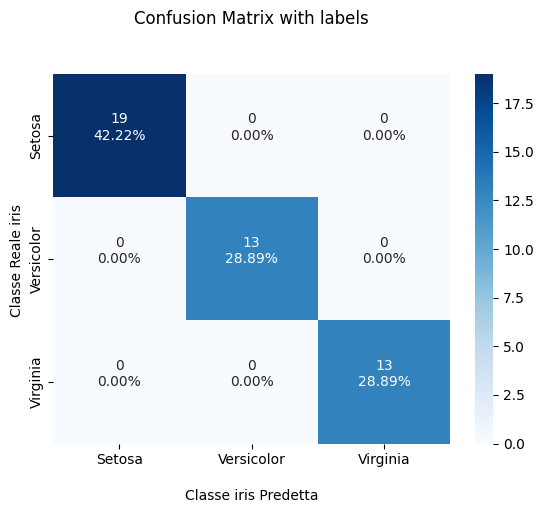

In [18]:
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)

prediction = svc.predict(X_test)
print('The accuracy of the SVM is: ', accuracy_score(prediction, y_test))
cf=confusion_matrix(y_test, prediction)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, prediction))

print("Classifiction Report :")
print(classification_report(y_test, prediction))
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
ax = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nClasse iris Predetta')
ax.set_ylabel('Classe Reale iris ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])



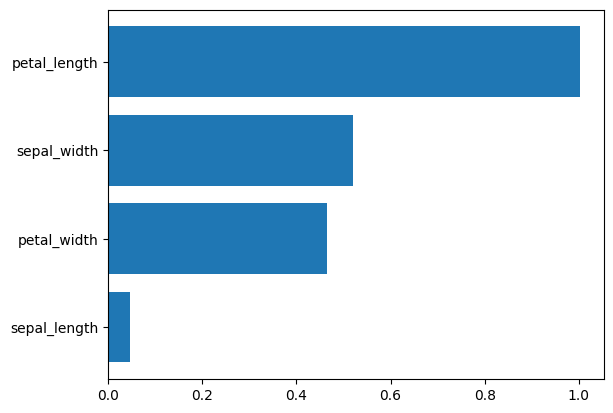

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

f_importances(abs(svc.coef_[0]), features_names)